In [8]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from os.path import join as path_join
from functools import partial

In [9]:
data_path = os.path.join('C:\\Users\\name\\Documents\\netology courses\\works with data\\names\\')
cols = ['Name', 'Gender', 'Count']

In [10]:
names_by_year = {}
for year in range(1900, 2001):
    names_by_year[year] = pd.read_csv(data_path + '\\yob{}.txt'.format(year), names=cols)
    names_all = pd.concat(names_by_year, names=['Year', 'Pos'])

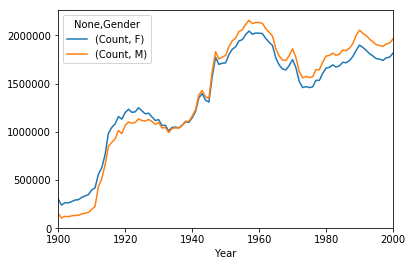

In [11]:
gender_dynamics = names_all.groupby([names_all.index.get_level_values(0),'Gender']).sum().unstack('Gender')
gender_dynamics.plot()

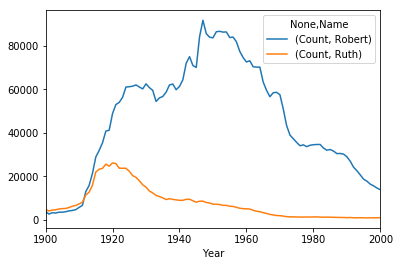

In [12]:
name_dynamics_cols = names_all.groupby([names_all.index.get_level_values(0),'Name']).sum().query('Name == ["Ruth", "Robert"]').unstack('Name')
name_dynamics_cols.plot()

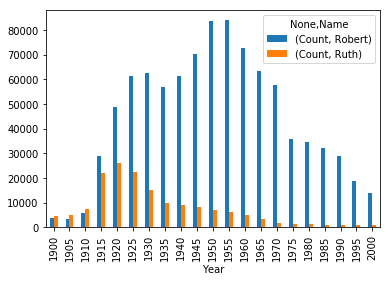

In [13]:
with_dir = partial(path_join, data_path)

def get_all_names_in_range(years_range):
    names_by_year = {}
    cols = ['Name', 'Gender', 'Count']

    for year in years_range:
        filename = with_dir(f'yob{year}.txt')
        names_by_year[year] = pd.read_csv(filename, names=cols)

    return pd.concat(names_by_year, names=['Year', 'Pos'])

years = range(1900, 2001, 5)

names_all = get_all_names_in_range(years)
name_dynamics_cols = names_all.groupby([names_all.index.get_level_values(0),'Name']).sum().query('Name == ["Ruth", "Robert"]').unstack('Name')
name_dynamics_cols.plot.bar()          

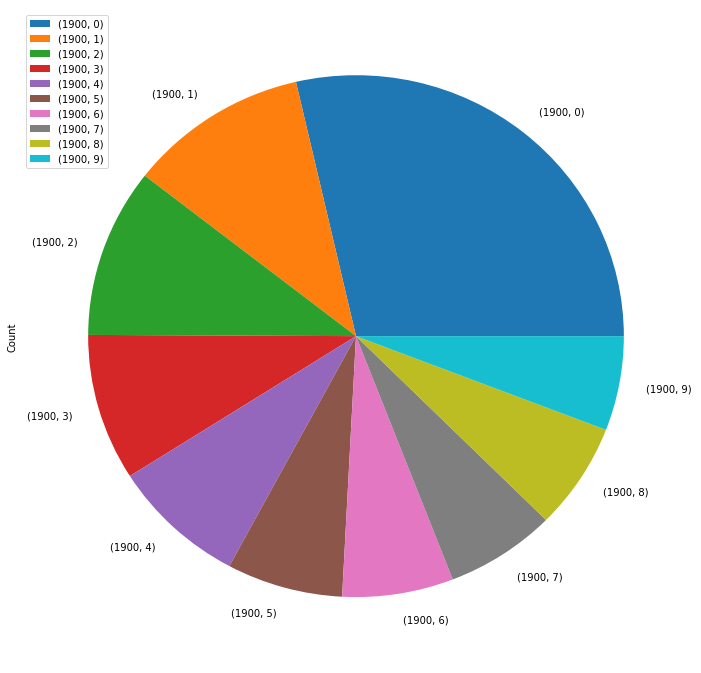

In [15]:
name = with_dir('yob1950.txt')
cols = ['Name', 'Gender', 'Count']
names = pd.read_csv(name, names=cols)
names_r = names[names['Name'].str.startswith('R')]
years = range(1900, 2001, 5)

names_all = get_all_names_in_range(years)
names_r.groupby('Name').sum().sort_values(by='Count', ascending = False)
names_all.head(10).plot.pie('Count', figsize=(12, 12))

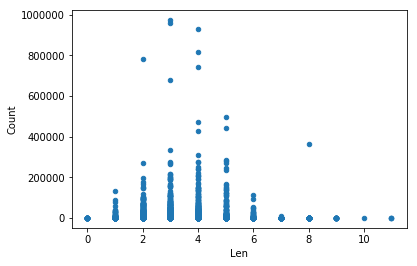

In [17]:
def count_consonants(row):
    name = row.name.upper()
    consonants = set('BCDFGHJKLMNPQRSTVWXZ')
    count = 0
    
    for c in name:
        if c in consonants:
            count += 1
    
    return count
        

all_names_scatter = names_all.copy().groupby('Name').sum()
all_names_scatter['Len'] = all_names_scatter.apply(count_consonants, axis=1)

all_names_scatter.plot.scatter(x='Len', y='Count')